In [ ]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LassoCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import plot_roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score,
    mean_squared_error,
    accuracy_score,
    multilabel_confusion_matrix,
    plot_confusion_matrix,
    roc_auc_score,
    roc_curve,
    auc
)

<b>Data Processing<b>

In [ ]:
joined_data = pd.read_csv(r'joined_data.csv', index_col=False)
joined_data['new_genres'] = joined_data['new_genres'].str.strip()

print(joined_data.info())

print(joined_data['new_genres'].value_counts())

genres_master_list = ['rock', 'pop', 'hip hop', 'classical', 'country', 'alternative', 'jazz', 'edm', 'metal']

equal_dist_df = pd.DataFrame(columns=joined_data.columns)

# select random sample of 4000 rows per genre to normalize distribution
for genre in genres_master_list:
    rows_of_genre = joined_data.loc[joined_data['new_genres'] == genre].sample(4000)
    equal_dist_df = equal_dist_df.append(rows_of_genre)

print(equal_dist_df['new_genres'].value_counts())

equal_dist_df = equal_dist_df.drop(["id", "name", "release_date", "mode", 'duration_ms', 'liveness', 'key'], axis = 1)

Y = equal_dist_df[equal_dist_df.columns[-1]]
X = equal_dist_df.drop(columns=[equal_dist_df.columns[-1]])

scaler = StandardScaler()
scaler.fit(X.values)

X_scaled = scaler.transform(X.values)
X_scaled_df = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, Y, test_size=.25)

Baseline Logistic Regression

In [ ]:
clf = LogisticRegression(random_state = 8).fit(X_train, y_train)
clf.score(X_train, y_train)

test_pred = clf.predict(X_test)
train_pred = clf.predict(X_train)

test_acc = (accuracy_score(test_pred, y_test))
test_error = 1 - test_acc
train_acc = (accuracy_score(train_pred, y_train))
train_error = (1 - train_acc)
test_prec = precision_score(y_test, test_pred, average='weighted')
test_recall = recall_score(y_test, test_pred, average='weighted')
train_prec = precision_score(y_train, train_pred, average='weighted')
train_recall = recall_score(y_train, train_pred, average='weighted')

print("Test Accuracy:", test_acc)
print("Test Error:", test_error)
print("Test Recall:", test_recall)
print("Test Precision:", test_prec)
print("-----------------------------------------")
print("Train Accuracy:", train_acc)
print("Train Error:", train_error)
print("Train Recall:", train_recall)
print("Train Precision:", train_prec)
print("-----------------------------------------")

print("Training snapshot")
df = pd.DataFrame({"Actual": y_train, "Predicted": train_pred})
print(df.head())
print("Training classification report:")
print(classification_report(y_train, train_pred, labels=genres_master_list))

print("Testing snapshot")
df = pd.DataFrame({"Actual": y_test, "Predicted": test_pred})
print(df.head())
print("Testing classification report:")
print(classification_report(y_test, test_pred, labels=genres_master_list))

Logistic Regression with 5-fold Cross Validation

In [ ]:
# Log. Regression with Cross Validation

clf = LogisticRegressionCV(cv = 5, random_state = 3)
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

test_pred = clf.predict(X_test)
train_pred = clf.predict(X_train)

test_acc = (accuracy_score(test_pred, y_test))
test_error = 1 - test_acc
train_acc = (accuracy_score(train_pred, y_train))
train_error = (1 - train_acc)
test_prec = precision_score(y_test, test_pred, average='weighted')
test_recall = recall_score(y_test, test_pred, average='weighted')
train_prec = precision_score(y_train, train_pred, average='weighted')
train_recall = recall_score(y_train, train_pred, average='weighted')

print("Test Accuracy:", test_acc)
print("Test Error:", test_error)
print("Test Recall:", test_recall)
print("Test Precision:", test_prec)
print("-----------------------------------------")
print("Train Accuracy:", train_acc)
print("Train Error:", train_error)
print("Train Recall:", train_recall)
print("Train Precision:", train_prec)
print("-----------------------------------------")

print("Training snapshot")
df = pd.DataFrame({"Actual": y_train, "Predicted": train_pred})
print(df.head())
print("Training classification report:")
print(classification_report(y_train, train_pred, labels=genres_master_list))

print("Testing snapshot")
df = pd.DataFrame({"Actual": y_test, "Predicted": test_pred})
print(df.head())
print("Testing classification report:")
print(classification_report(y_test, test_pred, labels=genres_master_list))

Logistic Regression with 5-fold Cross Validation and Lasso Penalty

In [ ]:
# Log. Regression with Cross Validation and Lasso

clf = LogisticRegressionCV(cv = 5, random_state = 12, penalty = 'l1', solver = 'saga')
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

test_pred = clf.predict(X_test)
train_pred = clf.predict(X_train)

test_acc = (accuracy_score(test_pred, y_test))
test_error = 1 - test_acc
train_acc = (accuracy_score(train_pred, y_train))
train_error = (1 - train_acc)
test_prec = precision_score(y_test, test_pred, average='weighted')
test_recall = recall_score(y_test, test_pred, average='weighted')
train_prec = precision_score(y_train, train_pred, average='weighted')
train_recall = recall_score(y_train, train_pred, average='weighted')

print("Test Accuracy:", test_acc)
print("Test Error:", test_error)
print("Test Recall:", test_recall)
print("Test Precision:", test_prec)
print("-----------------------------------------")
print("Train Accuracy:", train_acc)
print("Train Error:", train_error)
print("Train Recall:", train_recall)
print("Train Precision:", train_prec)
print("-----------------------------------------")


print("Training snapshot")
df = pd.DataFrame({"Actual": y_train, "Predicted": train_pred})
print(df.head())
print("Training classification report:")
print(classification_report(y_train, train_pred, labels=genres_master_list))

print("Testing snapshot")
df = pd.DataFrame({"Actual": y_test, "Predicted": test_pred})
print(df.head())
print("Testing classification report:")
print(classification_report(y_test, test_pred, labels=genres_master_list))

fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(clf, X_test, y_test, labels = genres_master_list, 
                      xticks_rotation='vertical', ax = ax, values_format = 'd')
    
plt.show()

Plot Multi-Class ROC Curves

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize


# Binarize the output
y_test_bin = label_binarize(y_test, classes = genres_master_list)
y_train_bin = label_binarize(y_train, classes = genres_master_list)

# Change whats inside this to match the model you're plotting
classifier = OneVsRestClassifier(LogisticRegressionCV(cv = 5, random_state = 12, penalty = 'l1', solver = 'saga'))
y_score = classifier.fit(X_train, y_train_bin).predict(X_test)

n_classes = 9

print("AUC Score:", roc_auc_score(y_test_bin, y_score, average = 'micro'))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve
plt.figure(figsize=(10, 10))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(genres_master_list[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")

plt.show()

<b>Data Processing<b>

In [2]:
joined_data = pd.read_csv(r'joined_data.csv', index_col=False)
joined_data['new_genres'] = joined_data['new_genres'].str.strip()

print(joined_data.info())

print(joined_data['new_genres'].value_counts())

genres_master_list = ['rock', 'pop', 'hip hop', 'classical', 'country', 'alternative', 'jazz', 'edm', 'metal']

equal_dist_df = pd.DataFrame(columns=joined_data.columns)

# select random sample of 4000 rows per genre to normalize distribution
for genre in genres_master_list:
    rows_of_genre = joined_data.loc[joined_data['new_genres'] == genre].sample(4000)
    equal_dist_df = equal_dist_df.append(rows_of_genre)

print(equal_dist_df['new_genres'].value_counts())

equal_dist_df = equal_dist_df.drop(["id", "name", "release_date", "mode", 'duration_ms', 'liveness', 'key'], axis = 1)

Y = equal_dist_df[equal_dist_df.columns[-1]]
X = equal_dist_df.drop(columns=[equal_dist_df.columns[-1]])

scaler = StandardScaler()
scaler.fit(X.values)

X_scaled = scaler.transform(X.values)
X_scaled_df = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, Y, test_size=.25)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180274 entries, 0 to 180273
Data columns (total 18 columns):
acousticness        180274 non-null float64
danceability        180274 non-null float64
duration_ms         180274 non-null int64
energy              180274 non-null float64
id                  180274 non-null object
instrumentalness    180274 non-null float64
key                 180274 non-null int64
liveness            180274 non-null float64
loudness            180274 non-null float64
mode                180274 non-null int64
name                180274 non-null object
popularity          180274 non-null int64
release_date        180274 non-null object
speechiness         180274 non-null float64
tempo               180274 non-null float64
valence             180274 non-null float64
year                180274 non-null int64
new_genres          180274 non-null object
dtypes: float64(9), int64(5), object(4)
memory usage: 24.8+ MB
None
rock           53860
pop            40438
j

Baseline Logistic Regression

In [3]:
clf = LogisticRegression(random_state = 8).fit(X_train, y_train)
clf.score(X_train, y_train)

test_pred = clf.predict(X_test)
train_pred = clf.predict(X_train)

test_acc = (accuracy_score(test_pred, y_test))
test_error = 1 - test_acc
train_acc = (accuracy_score(train_pred, y_train))
train_error = (1 - train_acc)
test_prec = precision_score(y_test, test_pred, average='weighted')
test_recall = recall_score(y_test, test_pred, average='weighted')
train_prec = precision_score(y_train, train_pred, average='weighted')
train_recall = recall_score(y_train, train_pred, average='weighted')

print("Test Accuracy:", test_acc)
print("Test Error:", test_error)
print("Test Recall:", test_recall)
print("Test Precision:", test_prec)
print("-----------------------------------------")
print("Train Accuracy:", train_acc)
print("Train Error:", train_error)
print("Train Recall:", train_recall)
print("Train Precision:", train_prec)
print("-----------------------------------------")

print("Training snapshot")
df = pd.DataFrame({"Actual": y_train, "Predicted": train_pred})
print(df.head())
print("Training classification report:")
print(classification_report(y_train, train_pred, labels=genres_master_list))

print("Testing snapshot")
df = pd.DataFrame({"Actual": y_test, "Predicted": test_pred})
print(df.head())
print("Testing classification report:")
print(classification_report(y_test, test_pred, labels=genres_master_list))

Test Accuracy: 0.4225555555555556
Test Error: 0.5774444444444444
Test Recall: 0.4225555555555556
Test Precision: 0.39115226092846367
-----------------------------------------
Train Accuracy: 0.42592592592592593
Train Error: 0.5740740740740741
Train Recall: 0.42592592592592593
Train Precision: 0.3939758295772169
-----------------------------------------
Training snapshot
             Actual Predicted
82019          rock     metal
176135          pop       pop
20830          rock      jazz
90665   alternative       pop
17913          jazz      jazz
Training classification report:
              precision    recall  f1-score   support

        rock       0.26      0.15      0.19      2955
         pop       0.23      0.13      0.17      2986
     hip hop       0.51      0.65      0.57      2972
   classical       0.76      0.86      0.80      3005
     country       0.29      0.28      0.29      3013
 alternative       0.24      0.16      0.19      3005
        jazz       0.49      0.57   

Logistic Regression with 5-fold Cross Validation

In [4]:
# Log. Regression with Cross Validation

clf = LogisticRegressionCV(cv = 5, random_state = 3)
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

test_pred = clf.predict(X_test)
train_pred = clf.predict(X_train)

test_acc = (accuracy_score(test_pred, y_test))
test_error = 1 - test_acc
train_acc = (accuracy_score(train_pred, y_train))
train_error = (1 - train_acc)
test_prec = precision_score(y_test, test_pred, average='weighted')
test_recall = recall_score(y_test, test_pred, average='weighted')
train_prec = precision_score(y_train, train_pred, average='weighted')
train_recall = recall_score(y_train, train_pred, average='weighted')

print("Test Accuracy:", test_acc)
print("Test Error:", test_error)
print("Test Recall:", test_recall)
print("Test Precision:", test_prec)
print("-----------------------------------------")
print("Train Accuracy:", train_acc)
print("Train Error:", train_error)
print("Train Recall:", train_recall)
print("Train Precision:", train_prec)
print("-----------------------------------------")

print("Training snapshot")
df = pd.DataFrame({"Actual": y_train, "Predicted": train_pred})
print(df.head())
print("Training classification report:")
print(classification_report(y_train, train_pred, labels=genres_master_list))

print("Testing snapshot")
df = pd.DataFrame({"Actual": y_test, "Predicted": test_pred})
print(df.head())
print("Testing classification report:")
print(classification_report(y_test, test_pred, labels=genres_master_list))

Test Accuracy: 0.4225555555555556
Test Error: 0.5774444444444444
Test Recall: 0.4225555555555556
Test Precision: 0.3910990979104917
-----------------------------------------
Train Accuracy: 0.4258888888888889
Train Error: 0.5741111111111111
Train Recall: 0.4258888888888889
Train Precision: 0.39392077613518567
-----------------------------------------
Training snapshot
             Actual Predicted
82019          rock     metal
176135          pop       pop
20830          rock      jazz
90665   alternative       pop
17913          jazz      jazz
Training classification report:
              precision    recall  f1-score   support

        rock       0.26      0.15      0.19      2955
         pop       0.23      0.13      0.17      2986
     hip hop       0.51      0.65      0.57      2972
   classical       0.76      0.86      0.80      3005
     country       0.29      0.28      0.29      3013
 alternative       0.24      0.16      0.19      3005
        jazz       0.49      0.57     

Logistic Regression with 5-fold Cross Validation and Lasso Penalty

Test Accuracy: 0.42277777777777775
Test Error: 0.5772222222222223
Test Recall: 0.42277777777777775
Test Precision: 0.3914030194738519
-----------------------------------------
Train Accuracy: 0.425962962962963
Train Error: 0.574037037037037
Train Recall: 0.425962962962963
Train Precision: 0.3939575101557849
-----------------------------------------
Training snapshot
             Actual Predicted
82019          rock     metal
176135          pop       pop
20830          rock      jazz
90665   alternative       pop
17913          jazz      jazz
Training classification report:
              precision    recall  f1-score   support

        rock       0.26      0.15      0.19      2955
         pop       0.23      0.13      0.17      2986
     hip hop       0.51      0.65      0.57      2972
   classical       0.76      0.86      0.80      3005
     country       0.29      0.28      0.29      3013
 alternative       0.24      0.16      0.19      3005
        jazz       0.49      0.57      0

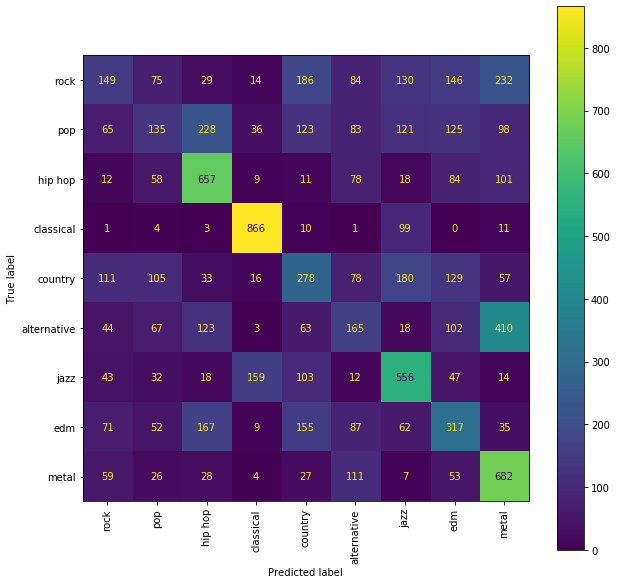

In [5]:
# Log. Regression with Cross Validation and Lasso

clf = LogisticRegressionCV(cv = 5, random_state = 12, penalty = 'l1', solver = 'saga')
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

test_pred = clf.predict(X_test)
train_pred = clf.predict(X_train)

test_acc = (accuracy_score(test_pred, y_test))
test_error = 1 - test_acc
train_acc = (accuracy_score(train_pred, y_train))
train_error = (1 - train_acc)
test_prec = precision_score(y_test, test_pred, average='weighted')
test_recall = recall_score(y_test, test_pred, average='weighted')
train_prec = precision_score(y_train, train_pred, average='weighted')
train_recall = recall_score(y_train, train_pred, average='weighted')

print("Test Accuracy:", test_acc)
print("Test Error:", test_error)
print("Test Recall:", test_recall)
print("Test Precision:", test_prec)
print("-----------------------------------------")
print("Train Accuracy:", train_acc)
print("Train Error:", train_error)
print("Train Recall:", train_recall)
print("Train Precision:", train_prec)
print("-----------------------------------------")


print("Training snapshot")
df = pd.DataFrame({"Actual": y_train, "Predicted": train_pred})
print(df.head())
print("Training classification report:")
print(classification_report(y_train, train_pred, labels=genres_master_list))

print("Testing snapshot")
df = pd.DataFrame({"Actual": y_test, "Predicted": test_pred})
print(df.head())
print("Testing classification report:")
print(classification_report(y_test, test_pred, labels=genres_master_list))

fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(clf, X_test, y_test, labels = genres_master_list, 
                      xticks_rotation='vertical', ax = ax, values_format = 'd')
    
plt.show()

Plot Multi-Class ROC Curves

AUC Score: 0.5684097222222222


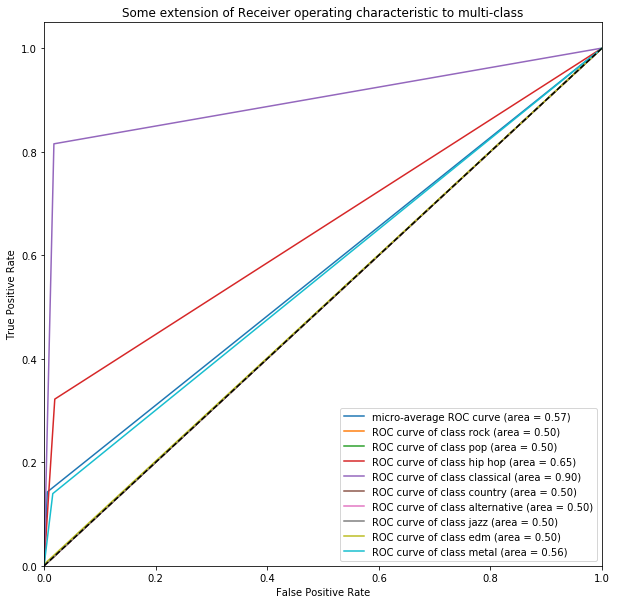

In [6]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize


# Binarize the output
y_test_bin = label_binarize(y_test, classes = genres_master_list)
y_train_bin = label_binarize(y_train, classes = genres_master_list)

# Change whats inside this to match the model you're plotting
classifier = OneVsRestClassifier(LogisticRegressionCV(cv = 5, random_state = 12, penalty = 'l1', solver = 'saga'))
y_score = classifier.fit(X_train, y_train_bin).predict(X_test)

n_classes = 9

print("AUC Score:", roc_auc_score(y_test_bin, y_score, average = 'micro'))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve
plt.figure(figsize=(10, 10))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(genres_master_list[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")

plt.show()